# Data PreProcessing - Encoding and Scaling

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data = pd.read_csv('placement 1.csv')
data

,Unnamed: 0,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,M,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0000
1,1,M,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0000
2,2,M,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0000
3,3,M,52.00,Sci&Tech,NaN,66.0,Mkt&HR,59.43,288655.4054
4,4,M,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...,...
210,210,M,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0000
211,211,M,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0000
212,212,M,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0000
213,213,F,58.00,Comm&Mgmt,No,NaN,Mkt&HR,60.23,204000.0000


In [24]:
data.columns

Index(['Unnamed: 0', 'gender', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'salary'],
      dtype='object')

In [26]:
data.describe()

,Unnamed: 0,degree_p,etest_p,mba_p,salary
count,215.000000,207.000000,206.000000,200.000000,211.000000
mean,107.000000,66.148019,71.934272,62.288950,288795.792236
std,62.209324,7.302777,13.268486,5.936314,77867.382898
min,0.000000,50.000000,50.000000,51.210000,200000.000000
25%,53.500000,61.000000,60.000000,57.875000,250000.000000
50%,107.000000,65.600000,70.500000,61.885000,288655.405400
75%,160.500000,71.825000,82.915000,66.325000,288655.405400
max,214.000000,91.000000,98.000000,77.890000,940000.000000


In [27]:
data.isnull().sum().sum()

44

In [28]:
data.columns[0]

'Unnamed: 0'

In [29]:
data.drop(data.columns[0],axis = 1,inplace = True)

In [30]:
data

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,NaN,66.0,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,NaN,Mkt&HR,60.23,204000.0000


In [31]:
data.drop_duplicates()

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,NaN,66.0,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,NaN,Mkt&HR,60.23,204000.0000


In [32]:
from sklearn.impute import SimpleImputer as si

imputer = si(strategy = 'mean',missing_values = np.nan)
imputer = imputer.fit(data[['degree_p','etest_p','mba_p','salary']])
data[['degree_p','etest_p','mba_p','salary']] = imputer.transform(data[['degree_p','etest_p','mba_p','salary']])
data

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.000000,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.500000,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.000000,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,NaN,66.000000,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.800000,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.000000,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.000000,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.000000,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,71.934272,Mkt&HR,60.23,204000.0000


In [33]:
data.isnull().sum()

gender            0
degree_p          0
degree_t          0
workex            4
etest_p           0
specialisation    4
mba_p             0
salary            0
dtype: int64

In [34]:
imputer = si(strategy = 'most_frequent', missing_values = np.nan)
imputer = imputer.fit(data[['workex','specialisation']])
data[['workex','specialisation']] = imputer.transform(data[['workex','specialisation']])
data

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.000000,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.500000,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.000000,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,No,66.000000,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.800000,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.000000,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.000000,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.000000,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,71.934272,Mkt&HR,60.23,204000.0000


In [35]:
data.isnull().sum().sum()

0

In [36]:
#missing values removed till now

<AxesSubplot:ylabel='Density'>

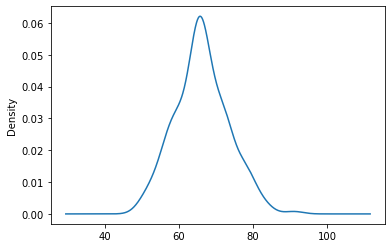

In [38]:
data['degree_p'].plot.kde()

In [39]:
data

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.000000,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.500000,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.000000,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,No,66.000000,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.800000,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.000000,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.000000,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.000000,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,71.934272,Mkt&HR,60.23,204000.0000


<AxesSubplot:ylabel='Density'>

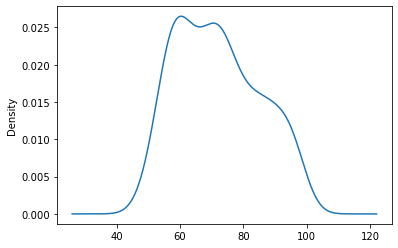

In [40]:
data['etest_p'].plot.kde()

<AxesSubplot:ylabel='Density'>

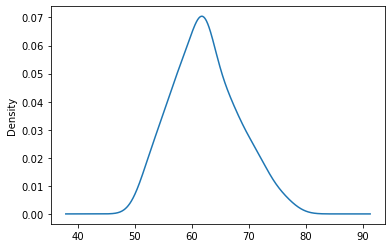

In [42]:
data['mba_p'].plot.kde()

<AxesSubplot:ylabel='Density'>

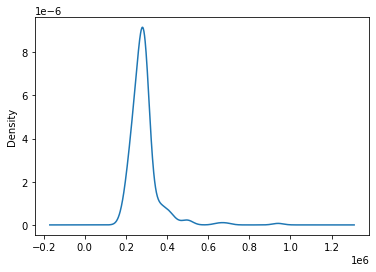

In [43]:
data['salary'].plot.kde()

In [44]:
#spliiting data into independent and dependent variables

In [45]:
data

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,58.00,Sci&Tech,No,55.000000,Mkt&HR,58.80,270000.0000
1,M,77.48,Sci&Tech,Yes,86.500000,Mkt&Fin,66.28,200000.0000
2,M,64.00,Comm&Mgmt,No,75.000000,Mkt&Fin,57.80,250000.0000
3,M,52.00,Sci&Tech,No,66.000000,Mkt&HR,59.43,288655.4054
4,M,73.30,Comm&Mgmt,No,96.800000,Mkt&Fin,55.50,425000.0000
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.000000,Mkt&Fin,74.49,400000.0000
211,M,72.00,Sci&Tech,No,74.000000,Mkt&Fin,53.62,275000.0000
212,M,73.00,Comm&Mgmt,Yes,59.000000,Mkt&Fin,69.72,295000.0000
213,F,58.00,Comm&Mgmt,No,71.934272,Mkt&HR,60.23,204000.0000


In [125]:
x = data[['gender','degree_p','workex','etest_p','specialisation','mba_p']]
y = data[['salary']]
x

,gender,degree_p,workex,etest_p,specialisation,mba_p
0,M,58.00,No,55.000000,Mkt&HR,58.80
1,M,77.48,Yes,86.500000,Mkt&Fin,66.28
2,M,64.00,No,75.000000,Mkt&Fin,57.80
3,M,52.00,No,66.000000,Mkt&HR,59.43
4,M,73.30,No,96.800000,Mkt&Fin,55.50
...,...,...,...,...,...,...
210,M,77.60,No,91.000000,Mkt&Fin,74.49
211,M,72.00,No,74.000000,Mkt&Fin,53.62
212,M,73.00,Yes,59.000000,Mkt&Fin,69.72
213,F,58.00,No,71.934272,Mkt&HR,60.23


In [126]:
y

,salary
0,270000.0000
1,200000.0000
2,250000.0000
3,288655.4054
4,425000.0000
...,...
210,400000.0000
211,275000.0000
212,295000.0000
213,204000.0000


In [127]:
y.dtypes

salary    float64
dtype: object

In [128]:
x.isnull().sum()

gender            0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
dtype: int64

In [129]:
#encoding categorical data of gender and workex column using labelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['workex'] = le.fit_transform(x['workex'])
x

<ipython-input-129-377c27577f0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['gender'] = le.fit_transform(x['gender'])
<ipython-input-129-377c27577f0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['workex'] = le.fit_transform(x['workex'])


,gender,degree_p,workex,etest_p,specialisation,mba_p
0,1,58.00,0,55.000000,Mkt&HR,58.80
1,1,77.48,1,86.500000,Mkt&Fin,66.28
2,1,64.00,0,75.000000,Mkt&Fin,57.80
3,1,52.00,0,66.000000,Mkt&HR,59.43
4,1,73.30,0,96.800000,Mkt&Fin,55.50
...,...,...,...,...,...,...
210,1,77.60,0,91.000000,Mkt&Fin,74.49
211,1,72.00,0,74.000000,Mkt&Fin,53.62
212,1,73.00,1,59.000000,Mkt&Fin,69.72
213,0,58.00,0,71.934272,Mkt&HR,60.23


In [130]:
#ecoding rest of categorical data using oneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')
x = ct.fit_transform(x)
x

array([[0.0, 1.0, 58.0, ..., 55.0, 'Mkt&HR', 58.8],
       [0.0, 1.0, 77.48, ..., 86.5, 'Mkt&Fin', 66.28],
       [0.0, 1.0, 64.0, ..., 75.0, 'Mkt&Fin', 57.8],
       ...,
       [0.0, 1.0, 73.0, ..., 59.0, 'Mkt&Fin', 69.72],
       [1.0, 0.0, 58.0, ..., 71.93427184466019, 'Mkt&HR', 60.23],
       [0.0, 1.0, 53.0, ..., 89.0, 'Mkt&HR', 60.22]], dtype=object)

In [132]:
x = pd.DataFrame(x,columns = ['gender','degree_p','workex','etest_p','sp1','sp2','mba_p'])
x

,gender,degree_p,workex,etest_p,sp1,sp2,mba_p
0,0,1,58,0,55,Mkt&HR,58.8
1,0,1,77.48,1,86.5,Mkt&Fin,66.28
2,0,1,64,0,75,Mkt&Fin,57.8
3,0,1,52,0,66,Mkt&HR,59.43
4,0,1,73.3,0,96.8,Mkt&Fin,55.5
...,...,...,...,...,...,...,...
210,0,1,77.6,0,91,Mkt&Fin,74.49
211,0,1,72,0,74,Mkt&Fin,53.62
212,0,1,73,1,59,Mkt&Fin,69.72
213,1,0,58,0,71.9343,Mkt&HR,60.23


In [133]:
x.columns

Index(['gender', 'degree_p', 'workex', 'etest_p', 'sp1', 'sp2', 'mba_p'], dtype='object')